Los siguientes datos representan la presión arterial sistótila (medida en milímetros de mercurio) de 50 hombres adultos saludables.

1.- 
a) Construye la tabla de distribución de frecuencias agrupadas.

b) Elabora el histograma y el polígono de frecuencias acumuladas.

c) Elabora las ojivas menor que y porcentual menor que.

2.- 

a) Con los datos de la tabla, construye los gráficos de barras y circular considerando como categorías los niveles de hipertensión que se muestran en la siguiente tabla:

b) ¿Qué porcentaje de hombres tiene presión baja?

c) ¿Qué porcentaje de hombres tiene hipertensión?

In [2]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

niveles = []
niveles = pd.DataFrame(niveles)
niveles['Nivel'] = ['Presión baja','PreHipertensión','Hipertensión']
niveles['Presión arterial'] = ['Menor a 120','De 120 a 139','140 o más']

niveles.head()

,Nivel,Presión arterial
0,Presión baja,Menor a 120
1,PreHipertensión,De 120 a 139
2,Hipertensión,140 o más


In [3]:
from pytest import freeze_includes
import DistribucionFrecuencias as df
archivo = open('/home/jesus/clases/Estadistica4/presiones.csv','r')
data = []
for i in archivo:
    data.append(float(i))

archivo.close()



N =  df.NumeroDatos(data)
maximo = max(data)
minimo = min(data)

R = df.Rango(maximo,minimo)
K = df.NumeroClases(N,RedondearArriba=True)

I = df.IntervaloClases(R,K)
limites = df.Limites(I,minimo,K)

frecuencia = df.Contar(data,limites,I,maximo)

frecuencia = np.delete(frecuencia,7)

marca_clase = df.MarcaClase(limites)

intervalos = df.Intervalos(limites)

h = df.FrecuenciaRelativa(frecuencia,N)
F = df.FrecuenciaAcumulada(frecuencia)
H = df.FrecuenciaRelativaAcumulada(F,N)

ValueError: x and y must have same first dimension, but have shapes (1,) and (7,)

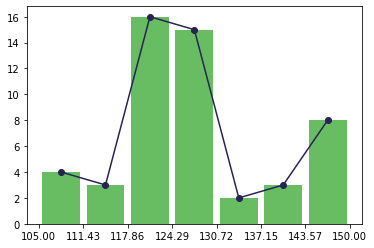

In [13]:
from matplotlib import markers
from matplotlib.pyplot import xticks

eje_y = []
for i in range(0,max(frecuencia)+2):
    if i%2 == 0:
        eje_y.append(i)

plot.hist(x=data,bins=K,color="#68BD62",rwidth=0.85)
plot.xticks(limites)
plot.yticks(eje_y)
plot.plot(marca_clase,frecuencia,color='#272355',marker = 'o')
plot.plot(124,frecuencia)

In [5]:


presion_baja = []
presion_pre = []
presion_hiper = []

for i in data:
    if i <= 120:
        presion_baja.append(i)
    elif i >120 and i<=139:
        presion_pre.append(i)
    elif i>139:
        presion_hiper.append(i)

print(presion_baja)
print(presion_pre)
print(presion_hiper)


[110.0, 105.0, 120.0, 120.0, 115.0, 110.0, 120.0, 120.0, 120.0, 120.0, 120.0, 110.0, 115.0, 115.0, 120.0, 118.0, 120.0]
[135.0, 129.0, 128.0, 122.0, 130.0, 125.0, 123.0, 123.0, 123.0, 126.0, 128.0, 130.0, 125.0, 127.0, 129.0, 123.0, 123.0, 128.0, 129.0, 130.0, 125.0, 130.0, 132.0]
[150.0, 140.0, 140.0, 146.0, 150.0, 145.0, 140.0, 145.0, 150.0, 150.0, 148.0]


              Nivel  Frecuencia
0      Presion baja          17
1  Pre hipertension          23
2      Hipertension          11


([<matplotlib.patches.Wedge at 0x7fd7fa67b970>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Presion baja'),
  Text(-1.0257194238946143, -0.3973659062442328, 'Pre hipertension'),
  Text(0.856988692113725, -0.6896161117529138, 'Hipertension')])

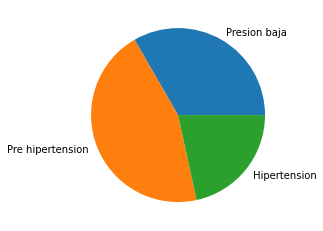

In [6]:
frecuencia_pb = len(presion_baja)
frecuencia_ph = len(presion_pre)
frecuencia_h = len(presion_hiper)

dfr = []
dfr = pd.DataFrame(dfr)

dfr['Nivel'] = ['Presion baja','Pre hipertension', 'Hipertension']
dfr['Frecuencia'] = [frecuencia_pb,frecuencia_ph,frecuencia_h]

print(dfr.head())
plot.pie(dfr['Frecuencia'],labels=dfr['Nivel'])

In [7]:
from sklearn.metrics import precision_recall_curve


frecuencia_relativa = []
for i in dfr['Frecuencia']:
    relativa = i*100/(frecuencia_h+frecuencia_ph+frecuencia_pb)
    frecuencia_relativa.append(round(relativa,2))

dfr['Frecuencia Relativa'] = frecuencia_relativa

dfr.head()

,Nivel,Frecuencia,Frecuencia Relativa
0,Presion baja,17,33.33
1,Pre hipertension,23,45.10
2,Hipertension,11,21.57
